# 소프트웨어 재판매 이익예측 form Tayko by KH

## 라이브러리 임포트

In [19]:
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

%matplotlib inline


## 데이타프레임 생성 및 변수 정리

In [20]:
soft_df = dmba.load_data('tayko.csv')
soft_df = soft_df.iloc[0:2000]

In [21]:
print(soft_df.columns.values[20])

Web order


In [22]:
# 컬럼 이름 바꾸기
soft_df.columns.values[20] = 'Web_order'
soft_df.columns.values[21] = 'Gender_male'


In [23]:
print(soft_df)

      sequence_number  US  source_a  source_c  source_b  source_d  source_e  \
0                   1   1         0         0         1         0         0   
1                   2   1         0         0         0         0         1   
2                   3   1         0         0         0         0         0   
3                   4   1         0         1         0         0         0   
4                   5   1         0         1         0         0         0   
...               ...  ..       ...       ...       ...       ...       ...   
1995             1996   1         0         0         0         0         0   
1996             1997   1         0         0         0         0         0   
1997             1998   1         0         0         0         0         0   
1998             1999   1         0         0         0         0         0   
1999             2000   1         0         0         0         0         0   

      source_m  source_o  source_h  ...  source_x  

In [24]:
# 컬럼 삭제 
soft_df.drop(['source_a','source_c','source_b','source_d','source_e'], axis=1, inplace=True)

In [25]:
# 컬럼 삭제 
soft_df.drop(['source_m','source_o','source_h','source_r','source_s'], axis=1, inplace=True)

In [26]:
# 컬럼 삭제 
soft_df.drop(['source_t','source_u','source_p','source_x','source_w'], axis=1, inplace=True)

In [27]:
# 컬럼 삭제 
soft_df.drop(['1st_update_days_ago','Purchase'], axis=1, inplace=True)

In [28]:
print(soft_df)

      sequence_number  US  Freq  last_update_days_ago  Web_order  Gender_male  \
0                   1   1     2                  3662          1            0   
1                   2   1     0                  2900          1            1   
2                   3   1     2                  3883          0            0   
3                   4   1     1                   829          0            1   
4                   5   1     1                   869          0            0   
...               ...  ..   ...                   ...        ...          ...   
1995             1996   1     1                  1701          1            0   
1996             1997   1     1                  2633          1            1   
1997             1998   1     0                  3394          0            0   
1998             1999   1     1                   253          0            1   
1999             2000   1     1                  1261          0            0   

      Address_is_res  Spend

In [29]:
#null data 확인
soft_df.isnull()

,sequence_number,US,Freq,last_update_days_ago,Web_order,Gender_male,Address_is_res,Spending
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False


In [30]:
#null data 확인
soft_df.isnull().sum()

sequence_number         0
US                      0
Freq                    0
last_update_days_ago    0
Web_order               0
Gender_male             0
Address_is_res          0
Spending                0
dtype: int64

In [31]:
# 만약 null 값이 있을 경우 삭제방법
# soft_df = soft_df.dropna()   null값이 있는 모든 행 삭제
# 또는 soft_df = df.dropna(axis=1)   null값이 있는 열(coulumn) 모두 제거


In [32]:
print(soft_df.describe())

       sequence_number           US         Freq  last_update_days_ago  \
count      2000.000000  2000.000000  2000.000000           2000.000000   
mean       1000.500000     0.824500     1.417000           2155.101000   
std         577.494589     0.380489     1.405738           1141.302846   
min           1.000000     0.000000     0.000000              1.000000   
25%         500.750000     1.000000     1.000000           1133.000000   
50%        1000.500000     1.000000     1.000000           2280.000000   
75%        1500.250000     1.000000     2.000000           3139.250000   
max        2000.000000     1.000000    15.000000           4188.000000   

         Web_order  Gender_male  Address_is_res    Spending  
count  2000.000000  2000.000000     2000.000000  2000.00000  
mean      0.426000     0.524500        0.221000   102.62500  
std       0.494617     0.499524        0.415024   186.78261  
min       0.000000     0.000000        0.000000     0.00000  
25%       0.000000     

In [34]:
gor_df = soft_df.groupby(['US','Freq','last_update_days_ago','Web_order','Gender_male','Address_is_res']).agg({'Spending':['mean','std']})

In [35]:
print(gor_df)

                                                                  Spending    
                                                                      mean std
US Freq last_update_days_ago Web_order Gender_male Address_is_res             
0  0    90                   0         1           0                   0.0 NaN
        220                  0         1           0                   0.0 NaN
        238                  1         1           1                   0.0 NaN
        470                  0         1           0                   0.0 NaN
        653                  0         0           0                   0.0 NaN
...                                                                    ...  ..
1  11   220                  0         0           0                1227.0 NaN
   12   220                  0         1           0                1446.0 NaN
        520                  1         0           0                1195.0 NaN
   13   281                  1         0           0

In [36]:
gor_df = soft_df.groupby(['US','Freq','last_update_days_ago','Web_order','Gender_male','Address_is_res']).agg({'Spending':['mean','std']})
print(gor_df)

                                                                  Spending    
                                                                      mean std
US Freq last_update_days_ago Web_order Gender_male Address_is_res             
0  0    90                   0         1           0                   0.0 NaN
        220                  0         1           0                   0.0 NaN
        238                  1         1           1                   0.0 NaN
        470                  0         1           0                   0.0 NaN
        653                  0         0           0                   0.0 NaN
...                                                                    ...  ..
1  11   220                  0         0           0                1227.0 NaN
   12   220                  0         1           0                1446.0 NaN
        520                  1         0           0                1195.0 NaN
   13   281                  1         0           0

In [37]:
gor_df = soft_df.groupby('US').agg({'Spending':['mean','std']})
print(gor_df)

      Spending            
          mean         std
US                        
0   101.216524  174.844401
1   102.924803  189.275664


  
  
  ## 모델 생성
predictiors : 독립변수로 사용할 변수 선택  
outcome : 종속변수로 사용할 변수 선택

In [12]:
predictors = ['US', 'Freq', 'last_update_days_ago', 'Web_order', 'Gender_male', 'Address_is_res']   #독립변수로 사용될 Coloum
outcome = 'Spending'    # 종속변수

# partition data 
X = pd.get_dummies(soft_df[predictors], drop_first=True)   #범주형 변수를 더미변수(이진수로 표현되는 변수, 0과 1로 나타냄)로 변환
y = soft_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1) # 학습데이터와 검증데이터로 분할

soft_lm = LinearRegression()    #선형 회귀모델 클래스를 사용하여 soft_lm 객체를 생성
soft_lm.fit(train_X, train_y)   #soft_lm 객체를 학습, 학습후 soft_lm을을 사용하여 새로운 입력 데이터에 대한 예측 수행

# print coefficients
print('intercept ', soft_lm.intercept_)    # 학습된 절편출력
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': soft_lm.coef_}))  #pandas dataframe 형식으로 독립변수에 대한 coefficient 나타냄 
 
# print performance measures
regressionSummary(train_y, soft_lm.predict(train_X)) #  모델의 성능평가 및 요약, Train y값과 예측된 y값을 받아 예측 성능에 대한 통계치와 정보를 출력

intercept  10.17629741458967
              Predictor  coefficient
0                    US    -4.620293
1                  Freq    91.274450
2  last_update_days_ago    -0.010374
3             Web_order    18.628731
4           Gender_male    -9.111366
5        Address_is_res   -75.815354

Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 125.9999
     Mean Absolute Error (MAE) : 79.4772


RMSE : 실제 값과 예측 값의 차이의 제곱값의 평균의 제곱근
MAE : 예측값과 실제 값의 차이를 평균한 값

In [62]:
gor_df = soft_df.groupby(['US'])['Spending'].agg(['mean','std'])
print(gor_df)

          mean         std
US                        
0   101.216524  174.844401
1   102.924803  189.275664


In [63]:
gor_df = soft_df.groupby(['Freq'])['Spending'].agg(['mean','std'])
print(gor_df)

             mean         std
Freq                         
0        0.000000    0.000000
1       66.322476  104.424412
2      123.479714  151.509696
3      234.993243  226.259754
4      306.061224  165.153642
5      459.862069  270.661719
6      556.750000  344.195009
7      642.125000  520.126478
8      933.500000  324.925120
9      870.500000  433.828307
10    1199.000000   21.213203
11    1334.000000  151.320851
12    1320.500000  177.483802
13    1443.000000         NaN
15    1133.000000         NaN


In [64]:
gor_df = soft_df.groupby(['last_update_days_ago'])['Spending'].agg(['mean','std'])
print(gor_df)

                            mean         std
last_update_days_ago                        
1                     109.000000         NaN
7                     129.000000         NaN
9                     196.000000         NaN
14                    303.000000         NaN
15                     71.000000  100.409163
...                          ...         ...
4065                   64.750000   58.987993
4096                   75.666667   93.681731
4127                   17.500000   24.748737
4157                   75.666667   95.516840
4188                   88.000000   76.374079

[940 rows x 2 columns]


In [65]:
gor_df = soft_df.groupby(['Web_order'])['Spending'].agg(['mean','std'])
print(gor_df)

                 mean         std
Web_order                        
0           82.902439  173.417088
1          129.199531  200.463840


In [66]:
gor_df = soft_df.groupby(['Gender_male'])['Spending'].agg(['mean','std'])
print(gor_df)

                   mean        std
Gender_male                       
0            107.339642  190.83233
1             98.350810  183.02006


In [67]:
gor_df = soft_df.groupby(['Address_is_res'])['Spending'].agg(['mean','std'])
print(gor_df)

                      mean         std
Address_is_res                        
0               105.306162  199.521159
1                93.174208  132.204281


In [13]:
pred_y = soft_lm.predict(train_X)   # soft_lm(학습된 선형 회귀모델)을 사용하여 입력데이타(train_X)에 대한 예측 값을 계산하여 pred_y에 저장

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, soft_lm))   : 결과 R2 값이 높을 수록 모델의 설명력이 높단고 판단할 수 있다.
print('AIC : ', AIC_score(train_y, pred_y, soft_lm))
print('BIC : ', BIC_score(train_y, pred_y, soft_lm))

adjusted r2 :  0.5221321114376756
AIC :  15028.52685802683
BIC :  15069.247472713037


In [14]:
# Use predict() to make predictions on a new set
soft_lm_pred = soft_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': soft_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - soft_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, soft_lm_pred)


       Predicted  Actual     Residual
674    89.214915       0   -89.214915
1699  202.231362     184   -18.231362
1282   49.159303       0   -49.159303
1315  824.841659    1289   464.158341
1210    0.121196       0    -0.121196
1636   86.766675       0   -86.766675
613    58.018614       0   -58.018614
447   247.428569    1255  1007.571431
1131   67.036615       0   -67.036615
808    67.825031       0   -67.825031
1496   -7.098168       0     7.098168
1468  194.814024     411   216.185976
1682  -13.480101       0    13.480101
1149  -32.457046       0    32.457046
442    61.247979       0   -61.247979
1813    4.497885     173   168.502115
654   -46.046854       0    46.046854
1264  -32.315195       0    32.315195
858    80.219048       0   -80.219048
1482   51.783900       0   -51.783900

Regression statistics

               Mean Error (ME) : 7.1933
Root Mean Squared Error (RMSE) : 136.7397
     Mean Absolute Error (MAE) : 83.6010


In [15]:
# MPE, MAPE 는 왜 출력되지 않지?

1.0


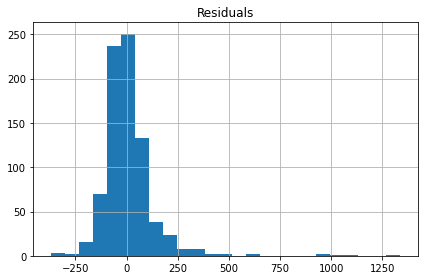

In [16]:
soft_lm_pred = soft_lm.predict(valid_X)
all_residuals = valid_y - soft_lm_pred

# Determine the percentage of datapoints with a residual in [-1406, 1406] = approx. 75\%   ??? data에 맞게 수정해야 함
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()

In [17]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 100)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')

   n     r2adj           AIC  Address_is_res  Freq  Gender_male     US  Web_order  \
0  1  0.490719  15099.943551           False  True        False  False      False   
1  2  0.516880  15037.660282            True  True        False  False      False   
2  3  0.520135  15030.544822            True  True        False  False      False   
3  4  0.522193  15026.383156            True  True        False  False       True   
4  5  0.522440  15026.758078            True  True         True  False       True   
5  6  0.522132  15028.526858            True  True         True   True       True   

   last_update_days_ago  
0                 False  
1                 False  
2                  True  
3                  True  
4                  True  
5                  True  


In [18]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: US, Freq, last_update_days_ago, Web_order, Gender_male, Address_is_res
Start: score=15028.53
Step: score=15026.76, remove US
Step: score=15026.38, remove Gender_male
Step: score=15026.38, remove None
['Freq', 'last_update_days_ago', 'Web_order', 'Address_is_res']


In [19]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

               Mean Error (ME) : 6.9616
Root Mean Squared Error (RMSE) : 136.5274
     Mean Absolute Error (MAE) : 83.4472


In [20]:
# The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: US, Freq, last_update_days_ago, Web_order, Gender_male, Address_is_res
Start: score=15908.65, constant
Step: score=15099.94, add Freq
Step: score=15037.66, add Address_is_res
Step: score=15030.54, add last_update_days_ago
Step: score=15026.38, add Web_order
Step: score=15026.38, add None
['Freq', 'Address_is_res', 'last_update_days_ago', 'Web_order']


In [21]:
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: US, Freq, last_update_days_ago, Web_order, Gender_male, Address_is_res
Start: score=15908.65, constant
Step: score=15099.94, add Freq
Step: score=15037.66, add Address_is_res
Step: score=15030.54, add last_update_days_ago
Step: score=15026.38, add Web_order
Step: score=15026.38, unchanged None
['Freq', 'Address_is_res', 'last_update_days_ago', 'Web_order']


In [22]:
lasso = Lasso(normalize=True, alpha=1)
lasso.fit(train_X, train_y)
regressionSummary(valid_y, lasso.predict(valid_X))

lasso_cv = LassoCV(normalize=True, cv=5)
lasso_cv.fit(train_X, train_y)
regressionSummary(valid_y, lasso_cv.predict(valid_X))
print('Lasso-CV chosen regularization: ', lasso_cv.alpha_)
print(lasso_cv.coef_)

ridge = Ridge(normalize=True, alpha=1)
ridge.fit(train_X, train_y)
regressionSummary(valid_y, ridge.predict(valid_X))

bayesianRidge = BayesianRidge(normalize=True)
bayesianRidge.fit(train_X, train_y)
regressionSummary(valid_y, bayesianRidge.predict(valid_X))
print('Bayesian ridge chosen regularization: ', bayesianRidge.lambda_ / bayesianRidge.alpha_)


Regression statistics

               Mean Error (ME) : 7.8223
Root Mean Squared Error (RMSE) : 147.0493
     Mean Absolute Error (MAE) : 83.0989

Regression statistics

               Mean Error (ME) : 7.2083
Root Mean Squared Error (RMSE) : 136.7585
     Mean Absolute Error (MAE) : 83.4015
Lasso-CV chosen regularization:  0.017158768452337228
[-3.02630677e+00  9.09029219e+01 -9.87649442e-03  1.76781635e+01
 -8.03868634e+00 -7.38626527e+01]

Regression statistics

               Mean Error (ME) : 7.3489
Root Mean Squared Error (RMSE) : 155.3242
     Mean Absolute Error (MAE) : 89.5668

Regression statistics

               Mean Error (ME) : 7.1924
Root Mean Squared Error (RMSE) : 136.7960
     Mean Absolute Error (MAE) : 83.5284
Bayesian ridge chosen regularization:  0.0044479378117621106


E:\Programs\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
E:\Programs\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sk

In [23]:
linearRegression = LinearRegression(normalize=True).fit(train_X, train_y)
regressionSummary(valid_y, linearRegression.predict(valid_X))


Regression statistics

               Mean Error (ME) : 7.1933
Root Mean Squared Error (RMSE) : 136.7397
     Mean Absolute Error (MAE) : 83.6010


E:\Programs\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [24]:
pd.DataFrame({'features': train_X.columns, 'linear regression': linearRegression.coef_, 
              'lassoCV': lasso_cv.coef_, 'bayesianRidge': bayesianRidge.coef_})

,features,linear regression,lassoCV,bayesianRidge
0,US,-4.620293,-3.026307,-4.492627
1,Freq,91.274450,90.902922,90.791529
2,last_update_days_ago,-0.010374,-0.009876,-0.010482
3,Web_order,18.628731,17.678163,18.743705
4,Gender_male,-9.111366,-8.038686,-9.133198
5,Address_is_res,-75.815354,-73.862653,-75.175295


In [25]:
# run a linear regression of Price on the remaining 11 predictors in the training set
train_df = train_X.join(train_y)

predictors = train_X.columns
formula = 'Spending ~ ' + ' + '.join(predictors)

soft_lm = sm.ols(formula=formula, data=train_df).fit()
print(soft_lm.summary())

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     219.3
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          1.26e-188
Time:                        21:00:49   Log-Likelihood:                -7506.3
No. Observations:                1200   AIC:                         1.503e+04
Df Residuals:                    1193   BIC:                         1.506e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.1763 

## 결과값이 0인 데이터 삭제하여 재분석
### 본 데이타는 미국 거주 및 